In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
theta = np.linspace(0, 1, 11)
print(theta)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [4]:
unif_distr_pdf = stats.uniform.pdf(theta) 
unif_distr_pdf = unif_distr_pdf / np.sum(unif_distr_pdf)
unif_distr_pdf

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

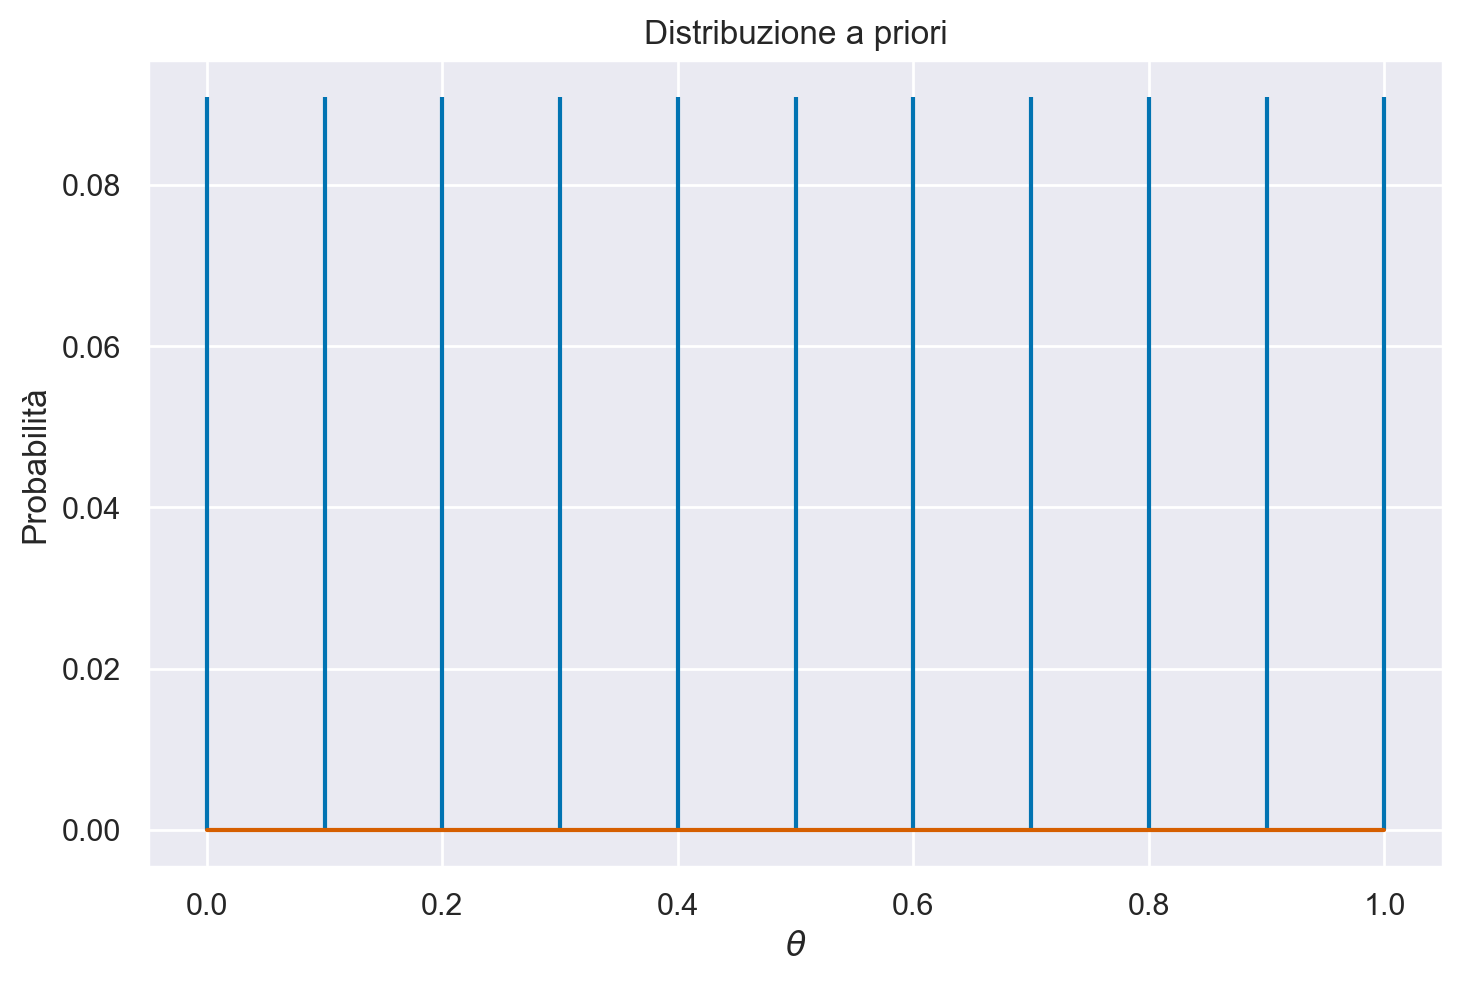

In [5]:
plt.stem(theta, unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("$\\theta$")
plt.ylabel("Probabilità");

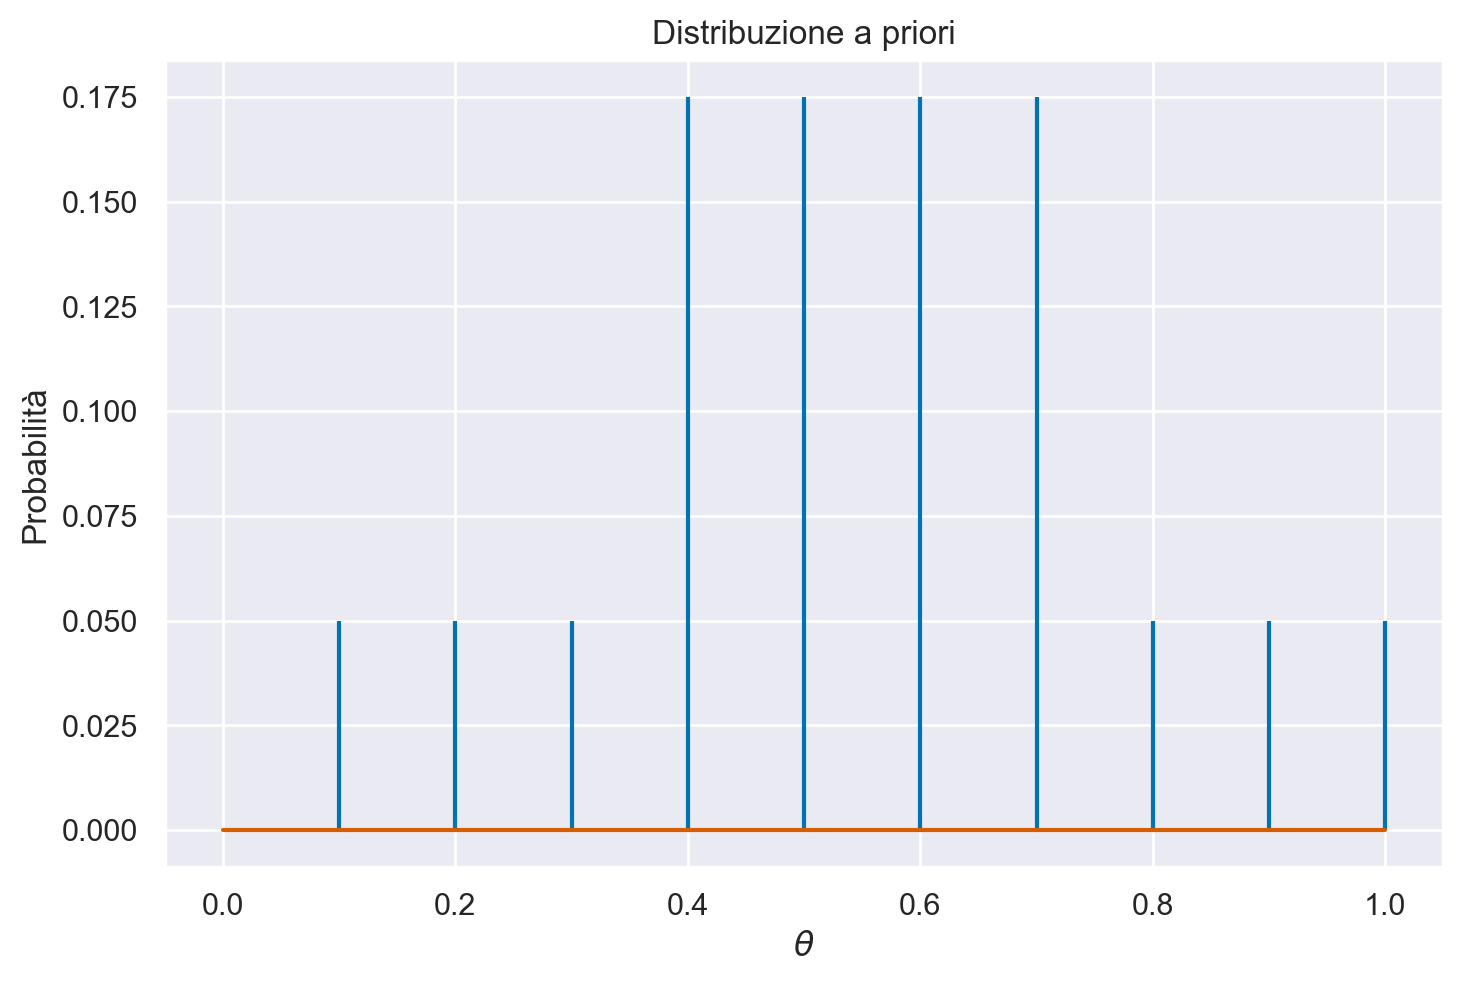

In [6]:
not_unif_distr_pdf = [0, 0.05, 0.05, 0.05, 0.175, 0.175, 0.175, 0.175, 0.05, 0.05, 0.05]
plt.stem(theta, not_unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("$\\theta$")
plt.ylabel("Probabilità");

In [7]:
lk = stats.binom.pmf(6, 9, theta)
lk = lk / np.sum(lk)
lk

array([0.00000000e+00, 6.11961968e-05, 2.75072287e-03, 2.09902955e-02,
       7.42695176e-02, 1.63955860e-01, 2.50659622e-01, 2.66654495e-01,
       1.76046264e-01, 4.46120274e-02, 0.00000000e+00])

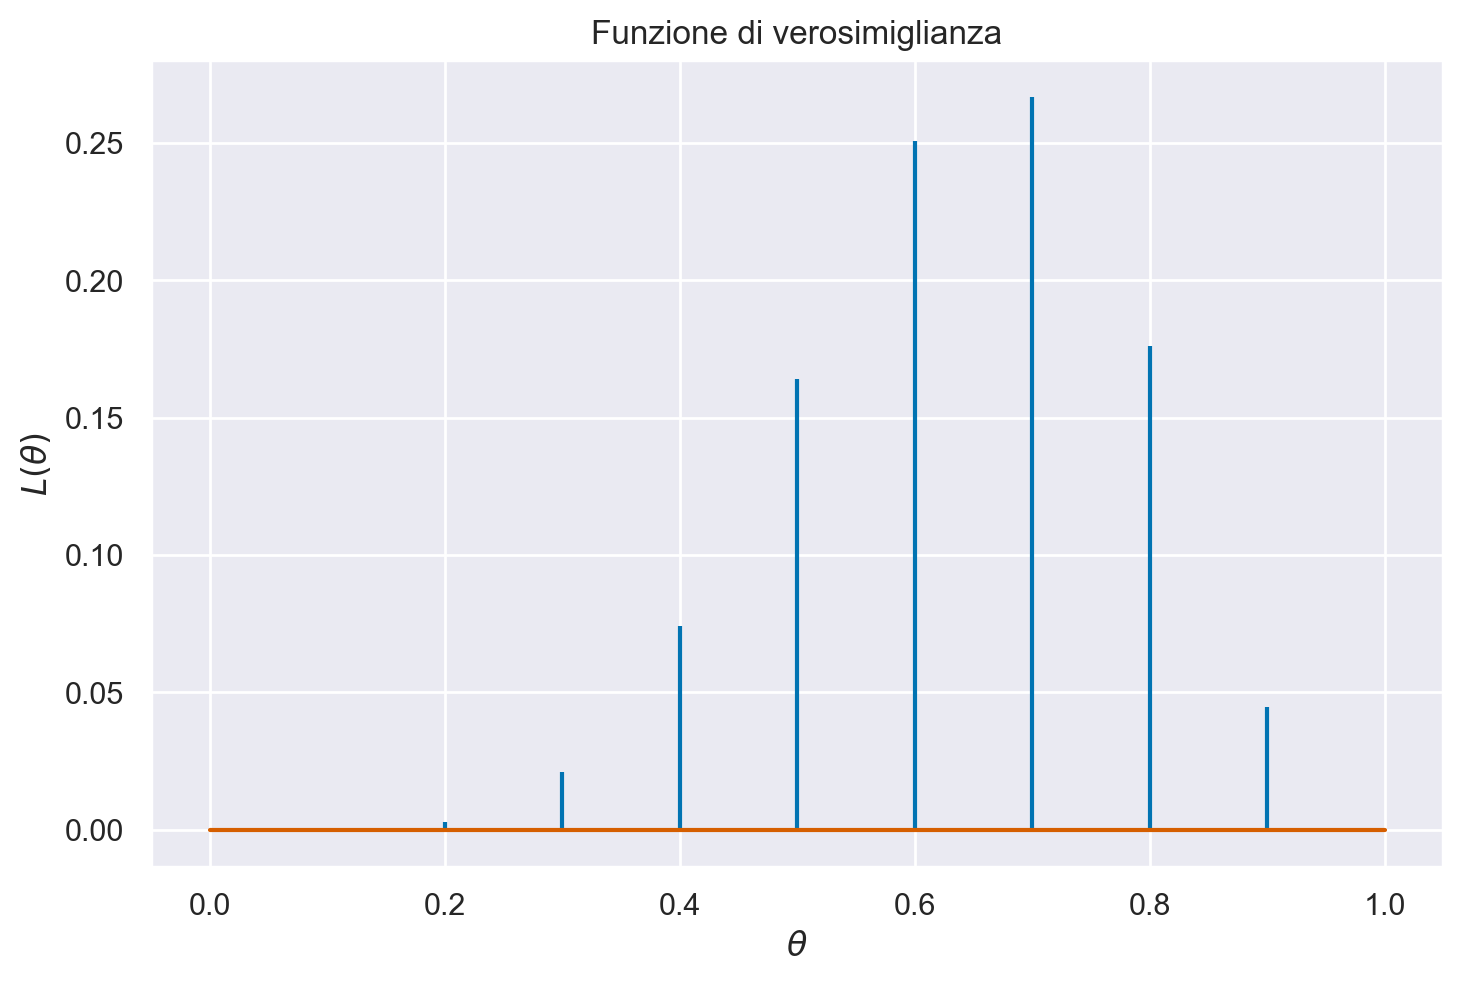

In [8]:
plt.stem(theta, lk, markerfmt=" ")
plt.title("Funzione di verosimiglianza")
plt.xlabel("$\\theta$")
plt.ylabel("$L(\\theta)$");

In [9]:
not_unif_distr_pdf * lk

array([0.00000000e+00, 3.05980984e-06, 1.37536144e-04, 1.04951477e-03,
       1.29971656e-02, 2.86922755e-02, 4.38654338e-02, 4.66645366e-02,
       8.80231320e-03, 2.23060137e-03, 0.00000000e+00])

In [10]:
not_unif_distr_pdf[7] * lk[7]

0.04666453655213576

In [11]:
np.sum(not_unif_distr_pdf * lk)

0.1444424367502889

In [12]:
post = (not_unif_distr_pdf * lk) / np.sum(not_unif_distr_pdf * lk)
print(post)

[0.00000000e+00 2.11835933e-05 9.52186538e-04 7.26597251e-03
 8.99816278e-02 1.98641591e-01 3.03687994e-01 3.23066667e-01
 6.09399384e-02 1.54428395e-02 0.00000000e+00]


In [13]:
np.sum(post)

0.9999999999999998

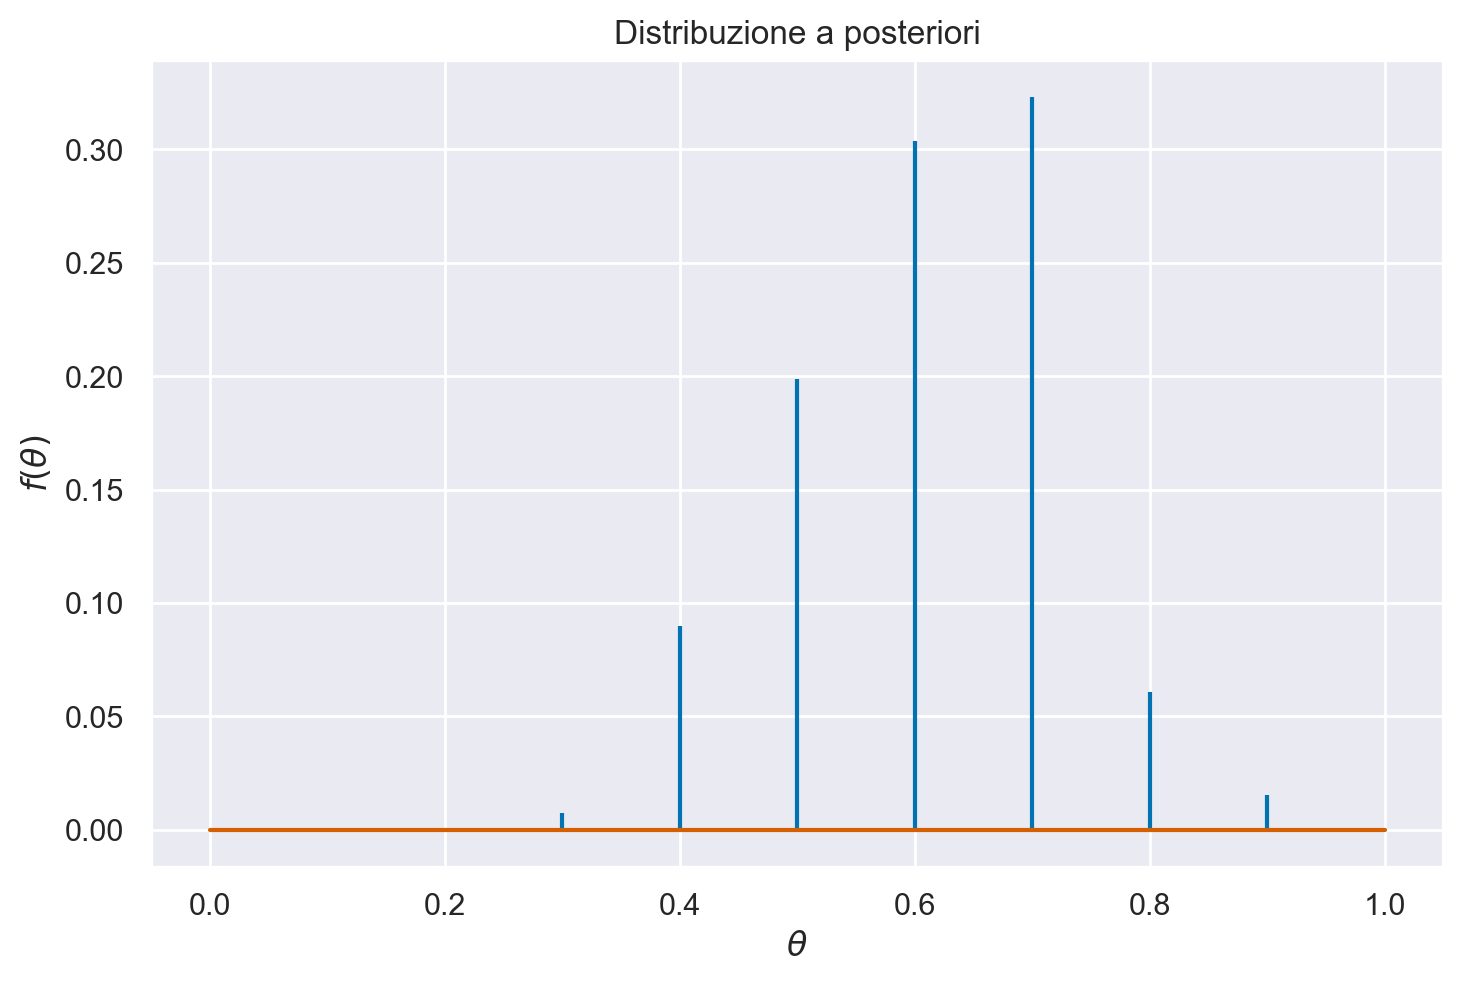

In [14]:
plt.stem(theta, post, markerfmt=" ")
plt.title("Distribuzione a posteriori")
plt.xlabel("$\\theta$")
plt.ylabel(r"$f(\theta)$");

In [15]:
np.sum(theta * post)

0.6086957633539818

In [16]:
np.sum(theta**2 * post) - (np.sum(theta * post)) ** 2

0.013379767754025051

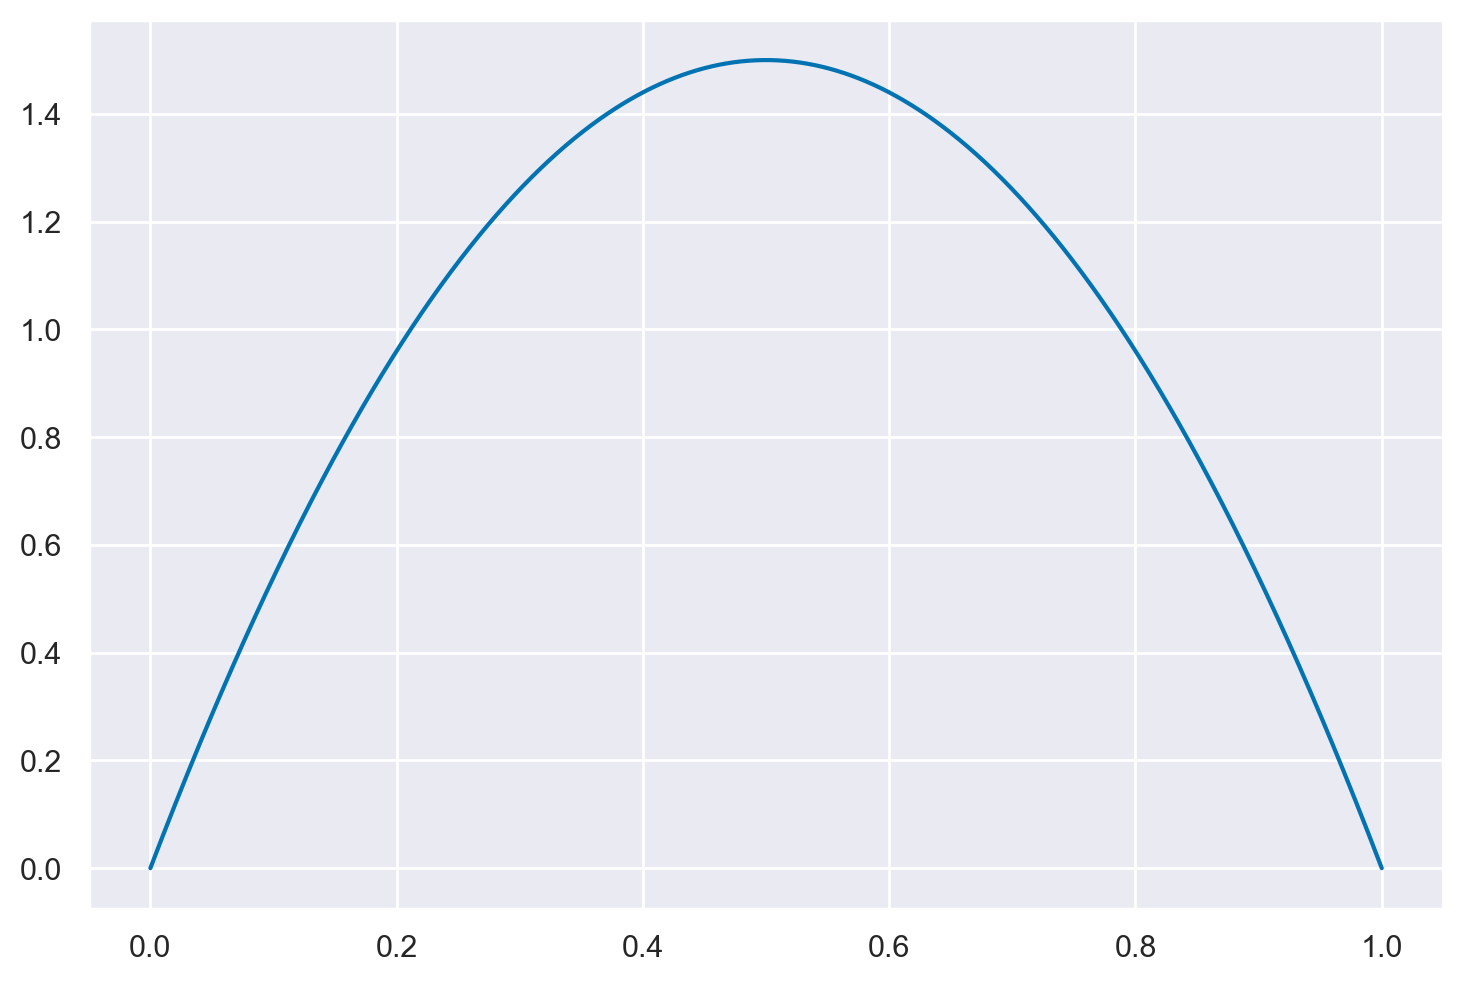

In [17]:
theta = np.linspace(0, 1, 1000)
_ = plt.plot(theta, stats.beta.pdf(theta, 2, 2), '-')

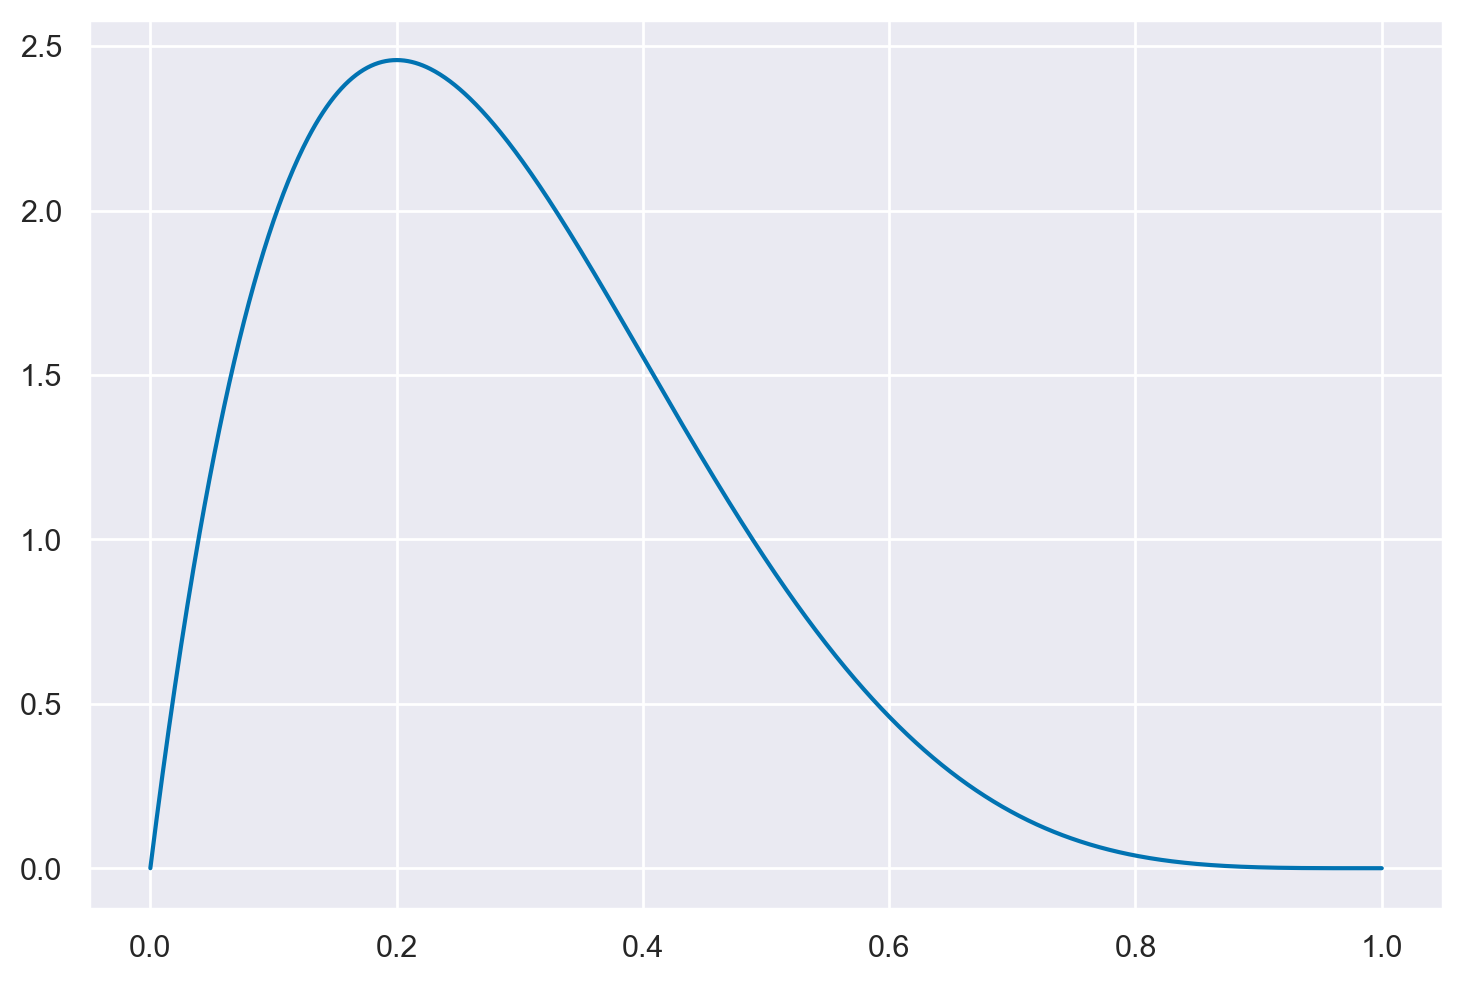

In [18]:
_ = plt.plot(theta, stats.beta.pdf(theta, 2, 5), '-')

In [19]:
prior = stats.beta.pdf(theta, 2, 5) 
prior = prior / np.sum(prior)

In [20]:
lk = stats.binom.pmf(6, 9, theta)
lk = lk / np.sum(lk)

In [21]:
post = (prior * lk) / np.sum(prior * lk)

In [22]:
np.sum(post)

1.0

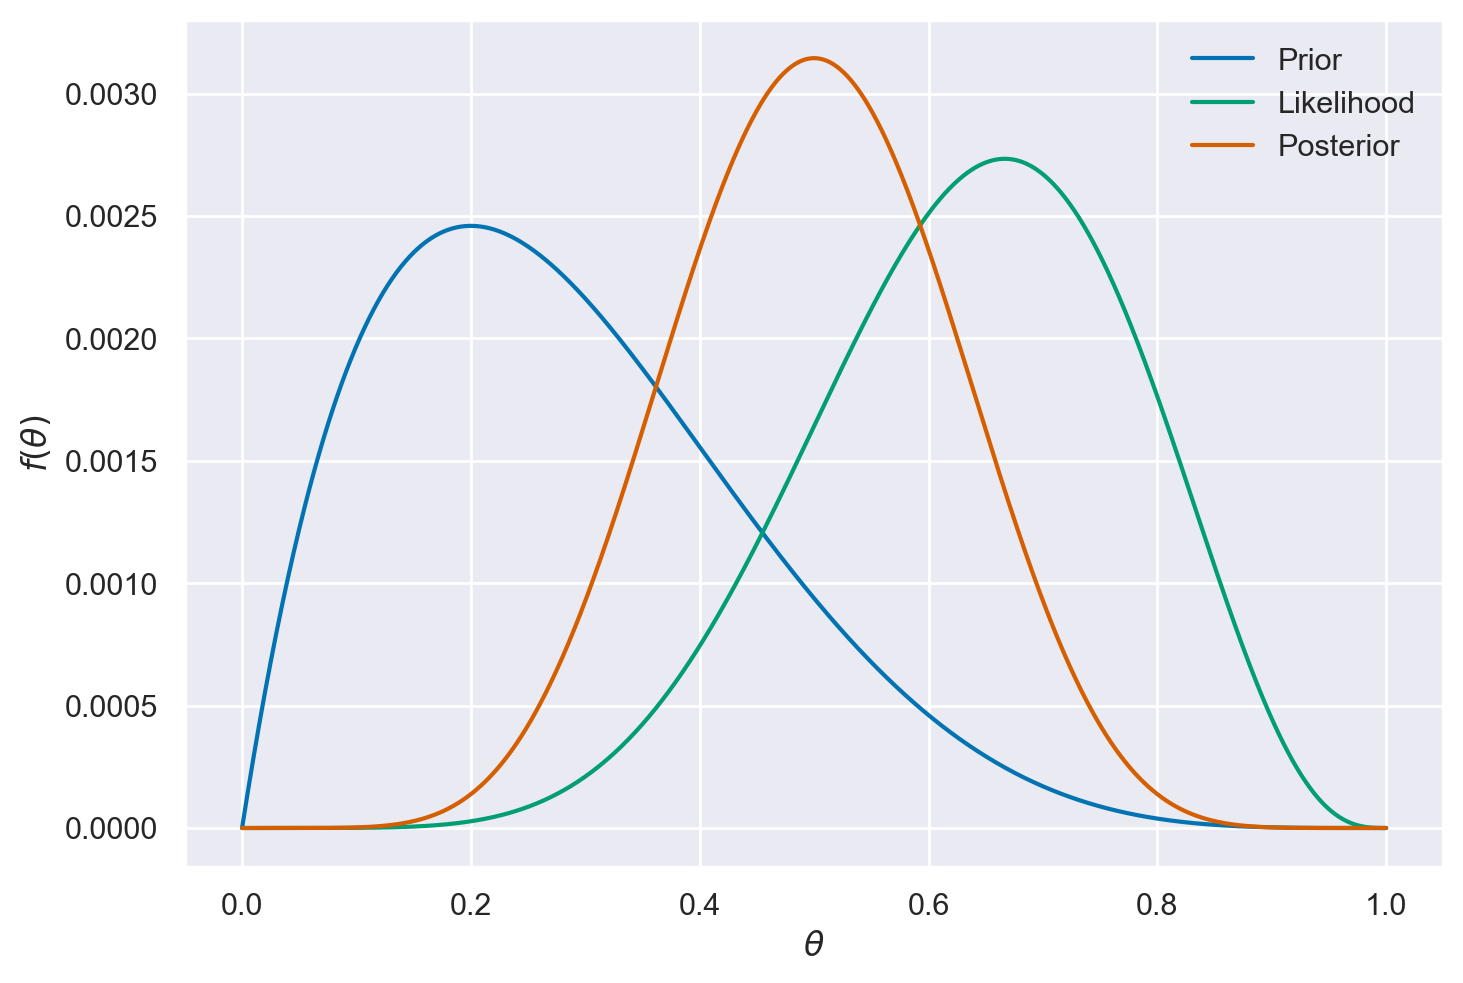

In [23]:
plt.plot(theta, prior, linestyle="solid", color="C0", label="Prior")
plt.plot(theta, lk, linestyle="solid", color="C2", label="Likelihood")
plt.plot(theta, post, linestyle="solid", color="C3", label="Posterior")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f(\theta)$")
plt.legend()
plt.show();

In [24]:
# media
np.sum(theta * post)

0.5

In [25]:
# deviazione standard
np.sqrt(np.sum(theta**2 * post) - (np.sum(theta * post)) ** 2)

0.1212678125181665

In [26]:
samples = np.random.choice(theta, p=post, size=int(1e4), replace=True)

/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/ipykernel_59116/3061577581.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


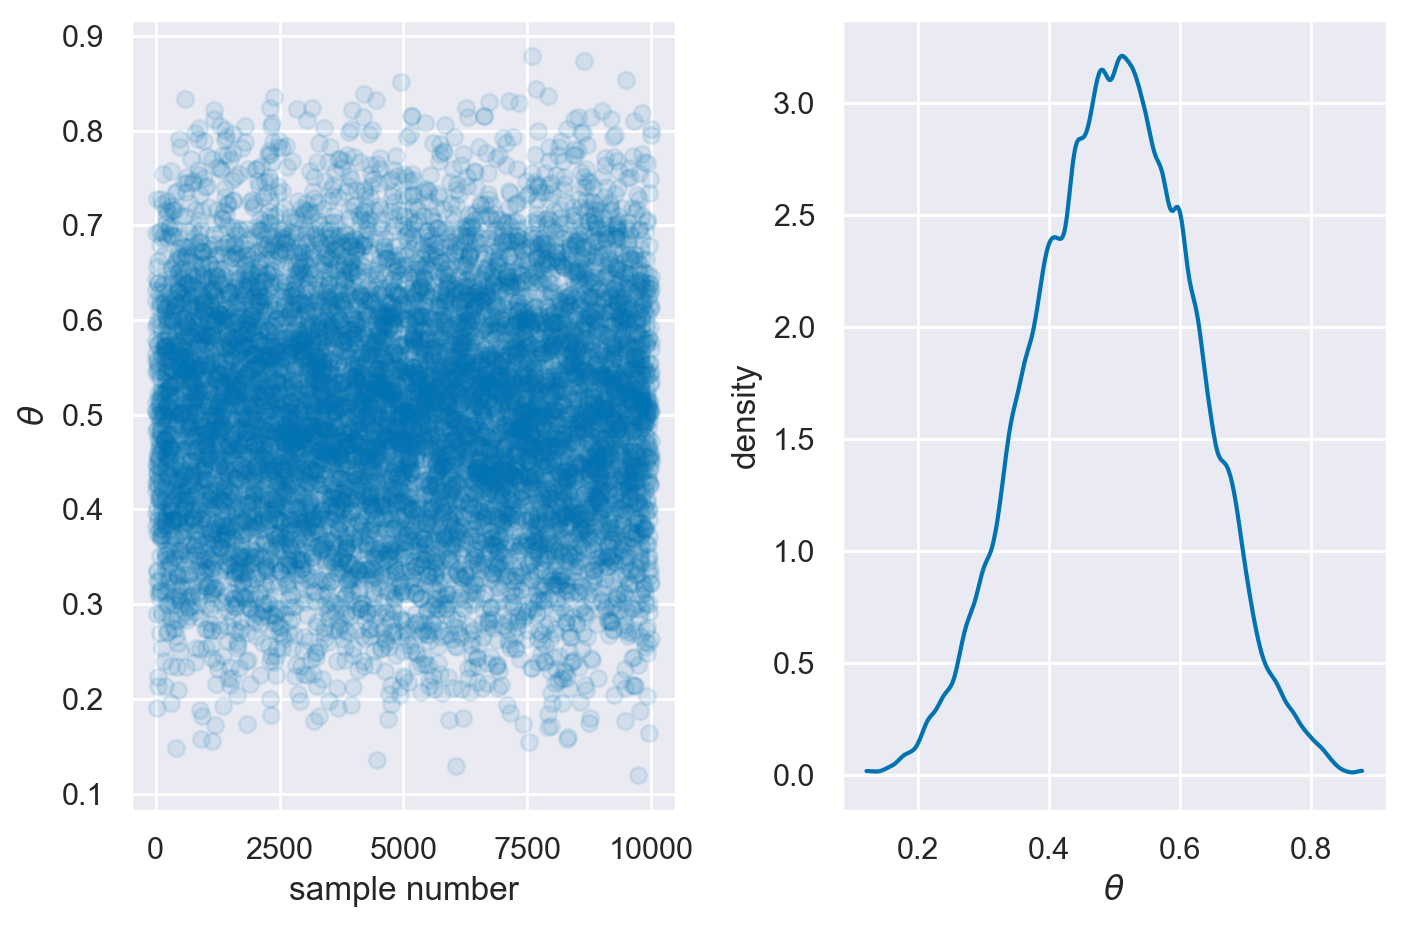

In [27]:
# First subplot: Scatter plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(samples, 'o', alpha=0.1)
plt.xlabel("sample number")
plt.ylabel(r"$\theta$")

# Second subplot: KDE plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
az.plot_kde(samples)
plt.xlabel(r"$\theta$")
plt.ylabel("density")
plt.tight_layout()
plt.show();

In [28]:
np.mean(samples)

0.5001618618618618

In [29]:
np.std(samples)

0.1212293349807632

In [30]:
theta[post == max(post)]

array([0.4994995])

In [31]:
stats.mode(samples)[0]

0.4744744744744745

In [32]:
np.median(samples)

0.5015015015015015

In [33]:
sum(post[theta < 0.5])

0.4999999999999997

In [34]:
sum(samples < 0.5) / 1e4

0.4945

In [35]:
sum((samples > 0.6) & (samples < 0.8)) / 1e4

0.2089

In [36]:
np.percentile(samples, [2, 98])

array([0.25425425, 0.74574575])

In [37]:
az.hdi(samples, hdi_prob=0.94)

array([0.26326326, 0.71171171])

In [38]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Jan 28 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

scipy     : 1.11.4
seaborn   : 0.13.0
matplotlib: 3.8.2
pandas    : 2.1.4
numpy     : 1.26.2
arviz     : 0.17.0

Watermark: 2.4.3

